In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#url = 'https://raw.githubusercontent.com/peskyji/EDA_on_Datasets/main/Bank_CC_Dataset/train_data.csv''
train_df = pd.read_csv('train_data.csv')
train_df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0


In [3]:
train_df.shape

(245725, 11)

In [4]:
test_df = pd.read_csv('test_data.csv')
test_df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No


In [5]:
test_df.shape

(105312, 10)

## combining both dataset to fill null values and encoding purpose

In [6]:
whole_df = pd.concat([train_df.drop(columns='Is_Lead') , test_df], 
                     axis=0, ignore_index=True)
whole_df.shape

(351037, 10)

In [7]:
#whole_df.loc[train_df.shape[0]]

## column counts and stats

In [8]:
whole_df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [9]:
whole_df.Gender.value_counts()

Male      191902
Female    159135
Name: Gender, dtype: int64

In [10]:
print('mean', whole_df.Age.mean())
print('median', whole_df.Age.median())
print('mode', whole_df.Age.mode())

mean 43.860715537108625
median 43.0
mode 0    28
dtype: int64


In [11]:
whole_df.Region_Code.unique().shape

(35,)

In [12]:
whole_df.Occupation.value_counts()

Self_Employed    144078
Salaried         102912
Other            100304
Entrepreneur       3743
Name: Occupation, dtype: int64

In [13]:
whole_df.Channel_Code.value_counts()

X1    148202
X3     97981
X2     96902
X4      7952
Name: Channel_Code, dtype: int64

In [14]:
print('mean', whole_df.Vintage.mean())
print('median', whole_df.Vintage.median())
print('mode', whole_df.Vintage.mode())

mean 46.924244452863945
median 32.0
mode 0    13
dtype: int64


In [15]:
print('mean', whole_df.Avg_Account_Balance.mean())
print('median', whole_df.Avg_Account_Balance.median())
print('mode', whole_df.Avg_Account_Balance.mode())

mean 1130140.5749906704
median 895162.0
mode 0    4022185
dtype: int64


In [16]:
whole_df.Credit_Product.value_counts(dropna=False)

No     205965
Yes    103225
NaN     41847
Name: Credit_Product, dtype: int64

In [17]:
whole_df.Is_Active.value_counts()

No     214087
Yes    136950
Name: Is_Active, dtype: int64

## filling missing values in Credit Product

### analysing Dataset based on different columns

In [18]:
whole_df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

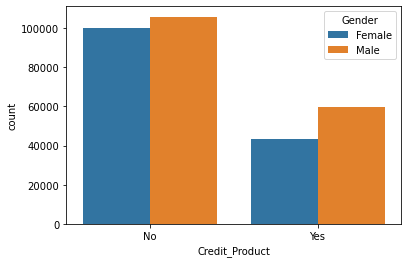

In [19]:
sns.countplot(x=whole_df.Credit_Product, hue=whole_df.Gender)

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

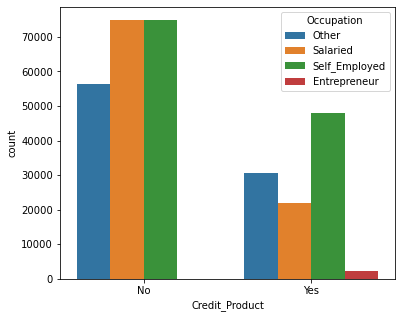

In [20]:
plt.subplots(figsize = (6,5))
sns.countplot(x=whole_df.Credit_Product, hue=whole_df.Occupation)

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

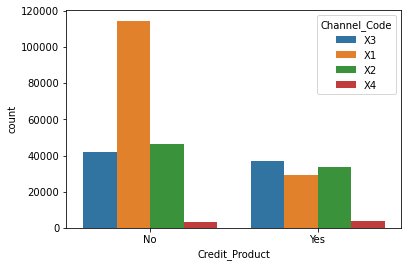

In [21]:
sns.countplot(x=whole_df.Credit_Product, hue=whole_df.Channel_Code)

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

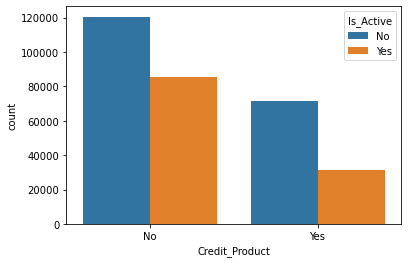

In [22]:
sns.countplot(x=whole_df.Credit_Product, hue=whole_df.Is_Active)

<AxesSubplot:xlabel='Age', ylabel='Count'>

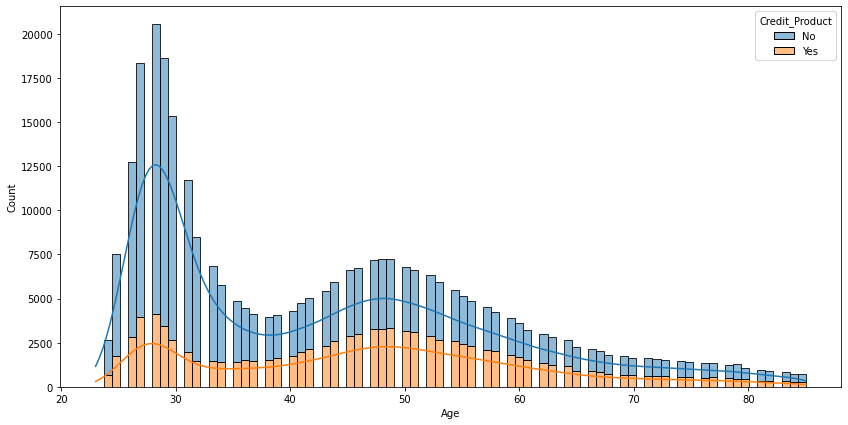

In [23]:
plt.subplots(figsize=(14,7))
sns.histplot(data=whole_df, x='Age', kde=True, 
             hue='Credit_Product', multiple='stack')

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

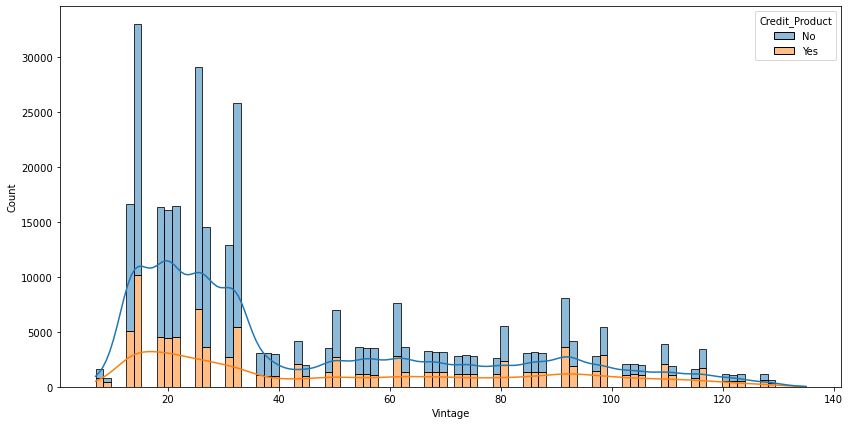

In [24]:
plt.subplots(figsize=(14,7))
sns.histplot(data=whole_df, x='Vintage', kde=True, 
             hue='Credit_Product', multiple='stack')

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

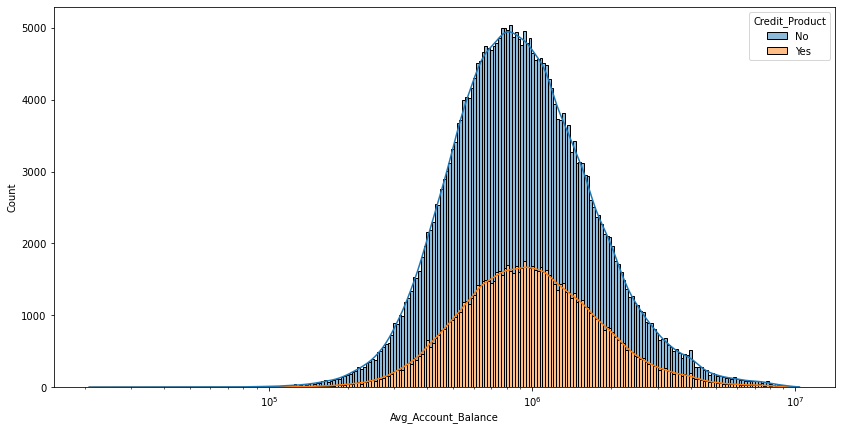

In [25]:
plt.subplots(figsize=(14,7))
sns.histplot(data=whole_df, x='Avg_Account_Balance', kde=True, 
             hue='Credit_Product', multiple='stack', log_scale=True)

### Occupation, Channel Code, Age, Vintage, Gender combination analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

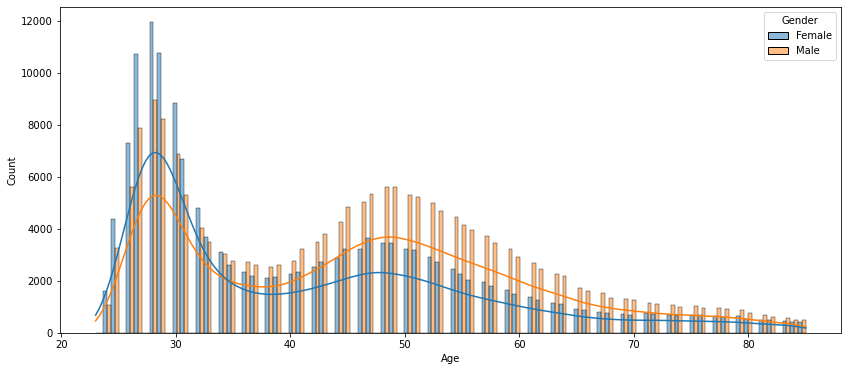

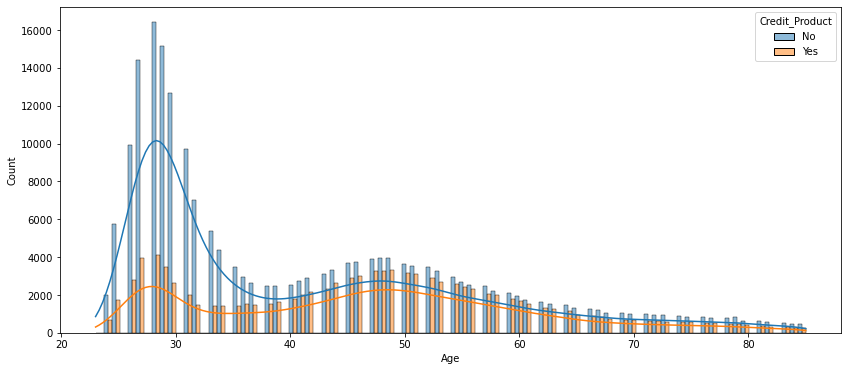

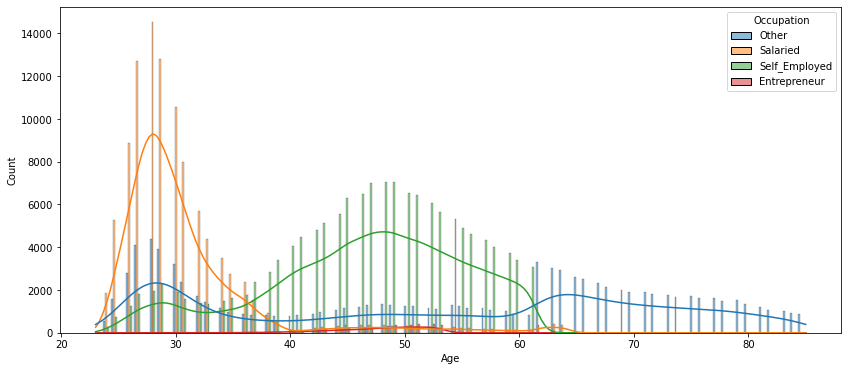

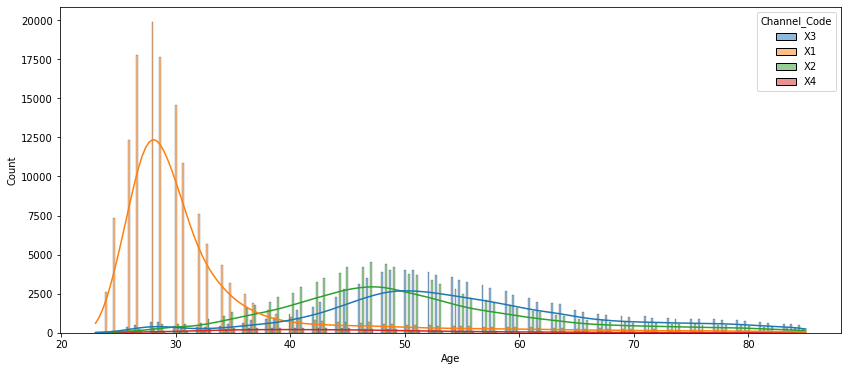

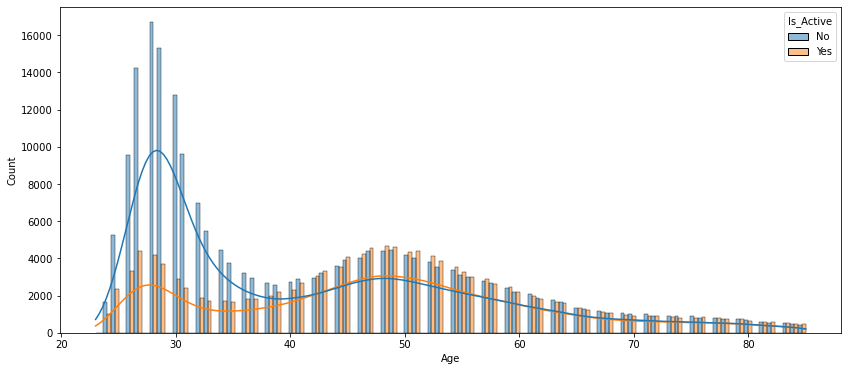

In [26]:
plt.subplots(figsize=(14,6))
sns.histplot(data=whole_df, x='Age', kde=True, 
             hue='Gender', multiple='dodge')

plt.subplots(figsize=(14,6))
sns.histplot(data=whole_df, x='Age', kde=True, 
             hue='Credit_Product', multiple='dodge')

plt.subplots(figsize=(14,6))
sns.histplot(data=whole_df, x='Age', kde=True, 
             hue='Occupation', multiple='dodge')

plt.subplots(figsize=(14,6))
sns.histplot(data=whole_df, x='Age', kde=True, 
             hue='Channel_Code', multiple='dodge')

plt.subplots(figsize=(14,6))
sns.histplot(data=whole_df, x='Age', kde=True, 
             hue='Is_Active', multiple='dodge')

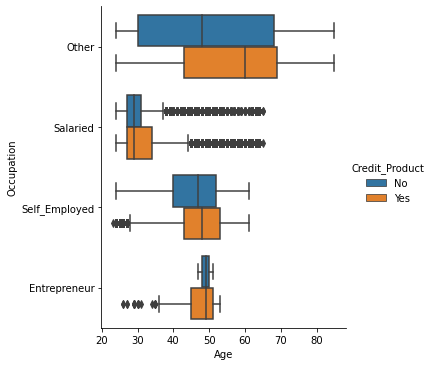

In [27]:
sns.catplot(data=whole_df, y='Occupation', x='Age', 
            hue='Credit_Product', kind='box')

#temp_df.Occupation.value_counts()

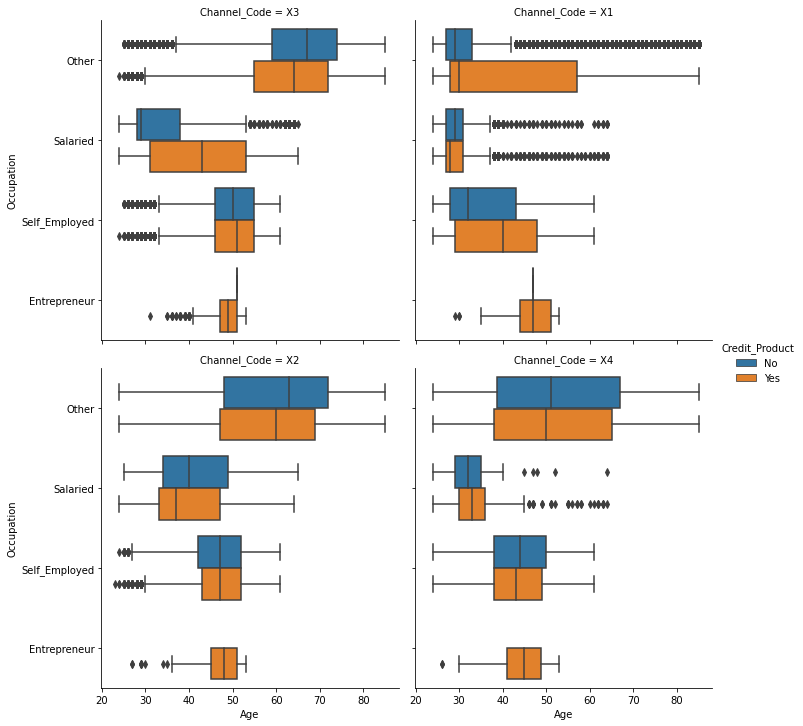

In [28]:
# sns.catplot(data=whole_df, y='Occupation', x='Age', col='Gender',
#             hue='Credit_Product', kind='box', height=6, aspect=1.5)

sns.catplot(data=whole_df, col='Channel_Code', x='Age', y='Occupation', col_wrap=2,
            hue='Credit_Product', kind='box', height=5, aspect=1)

#print(temp_df.groupby(['Occupation', 'Channel_Code']).Age.mean())
#print(temp_df.groupby(['Occupation', 'Channel_Code']).Age.median())

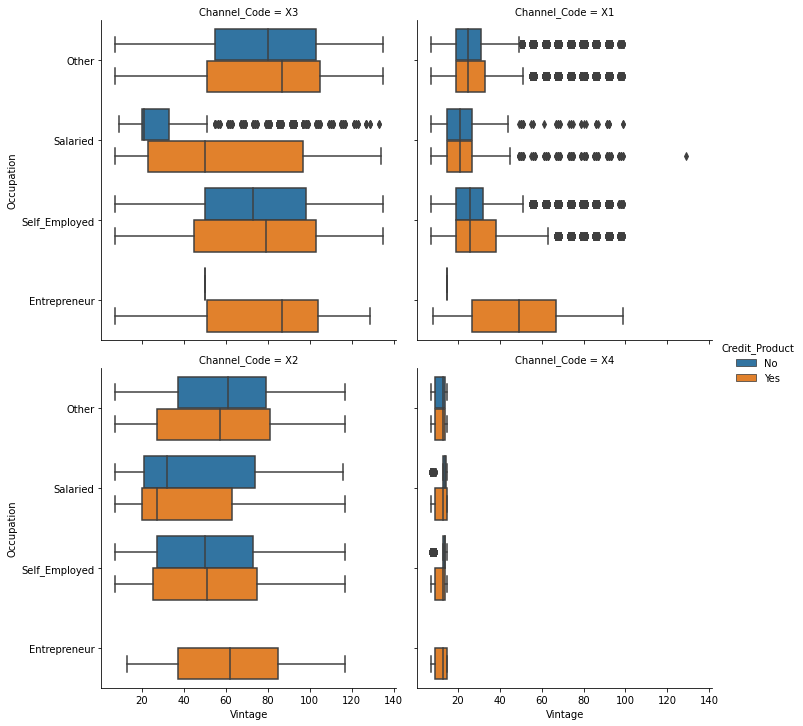

In [29]:
sns.catplot(data=whole_df, y='Occupation', x='Vintage', col='Channel_Code', col_wrap=2,
            hue='Credit_Product', kind='box', height=5, aspect=1)

In [30]:
# plt.subplots(figsize=(16,7))
# sns.pointplot(data=whole_df, x='Age', y='Vintage', hue='Credit_Product')

In [31]:
# plt.subplots(figsize=(16,7))
# sns.scatterplot(data=whole_df, x='Age', y='Vintage', hue='Credit_Product')

# plt.subplots(figsize=(16,7))
# sns.pointplot(data=whole_df, x='Age', y='Vintage', hue='Occupation')

In [32]:
temp1 = whole_df[whole_df.Channel_Code == 'X4']
#print(temp1.Vintage.max(), temp1.Vintage.min(),temp1.Vintage.mean(), temp1.Vintage.median())
#temp1[temp1.Vintage <= temp1.Vintage.max()].Credit_Product.value_counts(dropna = False)
temp1.Credit_Product.value_counts(dropna=False)

Yes    3683
No     3262
NaN    1007
Name: Credit_Product, dtype: int64

## analyzing null records

In [33]:
temp_df = whole_df[whole_df.Credit_Product.isna()]
temp_df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes
31,ABPMK4WU,Female,32,RG279,Salaried,X4,15,NaN,1072850,Yes
36,MTEIXMB9,Female,41,RG268,Self_Employed,X3,62,NaN,962383,No
40,6WX9JDVK,Female,63,RG254,Other,X3,103,NaN,1249319,Yes


In [34]:
temp_df.shape

(41847, 10)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

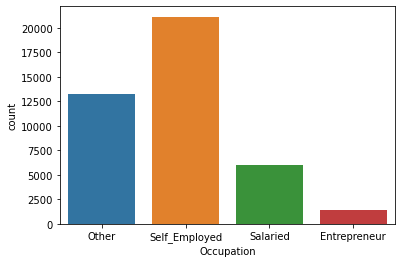

In [35]:
sns.countplot(x= temp_df.Occupation)

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

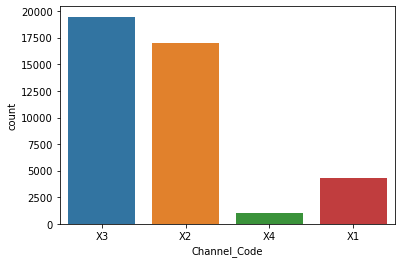

In [36]:
sns.countplot(x= temp_df.Channel_Code)

In [37]:
# sns.catplot(data=temp_df, y='Occupation', x='Age', col='Channel_Code',
#             kind='box', height=4, aspect=1)

In [38]:
# sns.catplot(data=temp_df, y='Occupation', x='Vintage', col='Channel_Code',
#             kind='box', height=4, aspect=1)

In [39]:
temp_df.Credit_Product.value_counts(dropna=False)

NaN    41847
Name: Credit_Product, dtype: int64

In [40]:
#index = temp_df[temp_df.Occupation == 'Entrepreneur'].index.to_list()
#temp_df.loc[index, 'Credit_Product'] = 'Yes'

In [41]:
index = temp_df[(temp_df.Occupation == 'Salaried') | (temp_df.Occupation == 'Other') & (temp_df.Channel_Code == 'X1') | (temp_df.Occupation == 'Entrepreneur') | (temp_df.Channel_Code == 'X4')].index.to_list()
temp_df.loc[index, 'Credit_Product'] = 'Yes'

C:\Users\shabisht\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [42]:
# whole_df[whole_df.Channel_Code == 'X3'].groupby(['Occupation']).Credit_Product.value_counts(dropna=False)

In [43]:
temp_df.Credit_Product.fillna('No', inplace=True)

C:\Users\shabisht\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [44]:
whole_df.drop(index = temp_df.index.to_list(), inplace=True)

In [45]:
whole_df = pd.concat([whole_df, temp_df], axis=0)

In [46]:
whole_df.loc[6]
#whole_df.shape

ID                     ETQCZFEJ
Gender                     Male
Age                          62
Region_Code               RG282
Occupation                Other
Channel_Code                 X3
Vintage                      20
Credit_Product               No
Avg_Account_Balance     1056750
Is_Active                   Yes
Name: 6, dtype: object

In [47]:
#whole_df.isna().sum()
#whole_df.head(10)

whole_df.sort_index(axis=0, inplace=True)
whole_df.head(16)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,No,1056750,Yes
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No


In [48]:
from sklearn.preprocessing import LabelEncoder

Gender = pd.get_dummies(whole_df.Gender, drop_first=True)
Channer_Code = pd.get_dummies(whole_df.Channel_Code, drop_first=True)
Credit_Product = pd.get_dummies(whole_df.Credit_Product, drop_first=True)
Occupation = pd.get_dummies(whole_df.Occupation, drop_first=True)
Is_Active = pd.get_dummies(whole_df.Is_Active, drop_first=True)

whole_df.Region_Code = LabelEncoder().fit_transform(whole_df.Region_Code)

In [49]:
whole_df.head(1)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,NNVBBKZB,Female,73,18,Other,X3,43,No,1045696,No


In [50]:
whole_df.drop(columns=['Gender','Channel_Code','Credit_Product','Occupation',
                       'Is_Active'], inplace=True)

In [51]:
whole_df = pd.concat([whole_df.drop('ID',axis=1), Gender, Channer_Code, Credit_Product,Occupation,
                      Is_Active.rename(columns={'Yes':'Is_Active'})], axis=1)

In [52]:
whole_df.head(1)

,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active
0,73,18,43,1045696,0,0,1,0,0,1,0,0,0


In [53]:
train_df = pd.concat([whole_df.loc[0:train_df.shape[0]-1], train_df.Is_Lead], axis=1)
train_df.shape

(245725, 14)

# Using Machine Learning Algorithms to predict Outputs

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression as LR
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

In [55]:
def train_model(data, algorithm):
    models, confusion_mat, report = [], [], []
    for algo in algorithm:
        if algo == 'lr':
            train_data = MinMaxScaler().fit_transform(data.drop(columns='Is_Lead'))
            X_train, X_test, y_train, y_test = train_test_split(train_data, data.Is_Lead,
                                                        test_size=0.40, random_state=100)
            model = LR().fit(X_train, y_train)
            predictions = model.predict(X_test)
            confusion_mat.append(confusion_matrix(y_test, predictions))
            report.append(classification_report(y_test, predictions))
            models.append(model)
            #precision.append(precision_score(y_test,predictions))

        else:
            X_train, X_test, y_train, y_test = train_test_split(train_data, data.Is_Lead,
                                                        test_size=0.40, random_state=100)
            if algo == 'dt':
                model = DT().fit(X_train, y_train)
            elif algo == 'rf':
                model = RF().fit(X_train, y_train)
            predictions = model.predict(X_test)
            confusion_mat.append(confusion_matrix(y_test, predictions))
            report.append(classification_report(y_test, predictions))
            models.append(model)
            #precision.append(precision_score(y_test,predictions))
            
    return models, confusion_mat, report
    

## Applying ML Algos to different datasets

## 1). Original Data

In [56]:
models, confusion_mat, report= train_model(train_df,['lr','dt','rf'])

for i in range(0,3):
    print(models[i])
    print(confusion_mat[i])
    print(report[i])

LogisticRegression()
[[71794  3277]
 [18713  4506]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     75071
           1       0.58      0.19      0.29     23219

    accuracy                           0.78     98290
   macro avg       0.69      0.58      0.58     98290
weighted avg       0.74      0.78      0.73     98290

DecisionTreeClassifier()
[[60495 14576]
 [13535  9684]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     75071
           1       0.40      0.42      0.41     23219

    accuracy                           0.71     98290
   macro avg       0.61      0.61      0.61     98290
weighted avg       0.72      0.71      0.72     98290

RandomForestClassifier()
[[69121  5950]
 [15771  7448]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     75071
           1       0.56      0.32      0.41     23219

    accuracy      

## 2.) Handled imbalance Data with the different techniques

In [57]:
print(train_df.Is_Lead.value_counts())

# First dividing the data based on 0 and 1 for Is_Lead
is_lead_0 = train_df[train_df.Is_Lead == 0]
is_lead_1 = train_df[train_df.Is_Lead == 1]
print(is_lead_0.shape, is_lead_1.shape)

0    187437
1     58288
Name: Is_Lead, dtype: int64
(187437, 14) (58288, 14)


## 2.1) DownSampling

In [58]:
# DownSamplling -  choosing only that much record from majority class as 
#                  there are in minority class

is_lead_0_d = is_lead_0.sample(is_lead_1.shape[0])

# lets check the size again after downsampling
print(is_lead_0_d.shape, is_lead_1.shape)

# creating a dataframe for downsampled records
train_df_ds = pd.concat([is_lead_0_d, is_lead_1], axis=0, ignore_index=True)
print(train_df_ds.shape)
train_df_ds.head(2)

(58288, 14) (58288, 14)
(116576, 14)


,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active,Is_Lead
0,33,4,68,832675,1,1,0,0,0,0,0,1,1,0
1,31,25,26,1019441,0,0,0,0,0,0,1,0,0,0


In [59]:
models_ds, confusion_mat_ds, report_ds = train_model(train_df_ds,['lr','dt','rf'])

for i in range(0,3):
    print(models_ds[i])
    print(confusion_mat_ds[i])
    print(report_ds[i])

LogisticRegression()
[[14602  8647]
 [ 6304 17078]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.66     23249
           1       0.66      0.73      0.70     23382

    accuracy                           0.68     46631
   macro avg       0.68      0.68      0.68     46631
weighted avg       0.68      0.68      0.68     46631

DecisionTreeClassifier()
[[14635  8614]
 [ 8692 14690]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     23249
           1       0.63      0.63      0.63     23382

    accuracy                           0.63     46631
   macro avg       0.63      0.63      0.63     46631
weighted avg       0.63      0.63      0.63     46631

RandomForestClassifier()
[[15921  7328]
 [ 6564 16818]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70     23249
           1       0.70      0.72      0.71     23382

    accuracy      

## Upsampling

In [60]:
# UpSamplling -  filling duplicate random enteries in minor class to make its count reach
#                to major class count. replace = True is mandatory

is_lead_1_u = is_lead_1.sample(is_lead_0.shape[0], replace = True)

print(is_lead_1_u.shape, is_lead_0.shape)

train_df_us = pd.concat([is_lead_1_u, is_lead_0], axis=0, ignore_index=True)
train_df_us.shape
#train_df_us

(187437, 14) (187437, 14)


(374874, 14)

In [61]:
models_us, confusion_mat_us, report_us = train_model(train_df_us,['lr','dt','rf'])

for i in range(0,3):
    print(models_us[i])
    print(confusion_mat_us[i])
    print(report_us[i])

LogisticRegression()
[[47423 27750]
 [20015 54762]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.67     75173
           1       0.66      0.73      0.70     74777

    accuracy                           0.68    149950
   macro avg       0.68      0.68      0.68    149950
weighted avg       0.68      0.68      0.68    149950

DecisionTreeClassifier()
[[57427 17746]
 [ 5586 69191]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     75173
           1       0.80      0.93      0.86     74777

    accuracy                           0.84    149950
   macro avg       0.85      0.84      0.84    149950
weighted avg       0.85      0.84      0.84    149950

RandomForestClassifier()
[[60895 14278]
 [ 5011 69766]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     75173
           1       0.83      0.93      0.88     74777

    accuracy      

## SMOTE

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(train_df.drop(columns='Is_Lead'),
                                            train_df.Is_Lead)
# checking the results
print(y_train_sm.value_counts())

train_df_sm = pd.concat([X_train_sm, y_train_sm], axis=1)
train_df_sm.head(2)

0    187437
1    187437
Name: Is_Lead, dtype: int64


,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active,Is_Lead
0,73,18,43,1045696,0,0,1,0,0,1,0,0,0,0
1,30,27,32,581988,0,0,0,0,0,0,1,0,0,0


In [63]:
models_sm, confusion_mat_sm, report_sm = train_model(train_df_sm,['lr','dt','rf'])

for i in range(0,3):
    print(models_sm[i])
    print(confusion_mat_sm[i])
    print(report_sm[i])

LogisticRegression()
[[62293 12517]
 [23901 51239]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     74810
           1       0.80      0.68      0.74     75140

    accuracy                           0.76    149950
   macro avg       0.76      0.76      0.76    149950
weighted avg       0.76      0.76      0.76    149950

DecisionTreeClassifier()
[[57156 17654]
 [16454 58686]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     74810
           1       0.77      0.78      0.77     75140

    accuracy                           0.77    149950
   macro avg       0.77      0.77      0.77    149950
weighted avg       0.77      0.77      0.77    149950

RandomForestClassifier()
[[64659 10151]
 [17166 57974]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83     74810
           1       0.85      0.77      0.81     75140

    accuracy      

## ADASYN

In [64]:
from imblearn.over_sampling import ADASYN

# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(train_df.drop(columns='Is_Lead'),
                                            train_df.Is_Lead)
# checking the results
print(y_train_ada.value_counts())

train_df_ada = pd.concat([X_train_ada, y_train_ada], axis=1)
train_df_ada.head(2)

0    187437
1    178524
Name: Is_Lead, dtype: int64


,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active,Is_Lead
0,73,18,43,1045696,0,0,1,0,0,1,0,0,0,0
1,30,27,32,581988,0,0,0,0,0,0,1,0,0,0


In [65]:
models_ada, confusion_mat_ada, report_ada = train_model(train_df_ada,['lr','dt','rf'])

for i in range(0,3):
    print(models_ada[i])
    print(confusion_mat_ada[i])
    print(report_ada[i])

LogisticRegression()
[[63132 11535]
 [24801 46917]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78     74667
           1       0.80      0.65      0.72     71718

    accuracy                           0.75    146385
   macro avg       0.76      0.75      0.75    146385
weighted avg       0.76      0.75      0.75    146385

DecisionTreeClassifier()
[[57261 17406]
 [16571 55147]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     74667
           1       0.76      0.77      0.76     71718

    accuracy                           0.77    146385
   macro avg       0.77      0.77      0.77    146385
weighted avg       0.77      0.77      0.77    146385

RandomForestClassifier()
[[64833  9834]
 [17348 54370]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     74667
           1       0.85      0.76      0.80     71718

    accuracy      

## SMOTE + TOMEK

In [66]:
from imblearn.combine import SMOTETomek

# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(train_df.drop(columns='Is_Lead'),
                                            train_df.Is_Lead)
# checking the results
print(y_train_smtom.value_counts())

train_df_smtom = pd.concat([X_train_smtom, y_train_smtom], axis=1)
train_df_smtom.head(2)

0    170148
1    170148
Name: Is_Lead, dtype: int64


,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active,Is_Lead
0,73,18,43,1045696,0,0,1,0,0,1,0,0,0,0
1,30,27,32,581988,0,0,0,0,0,0,1,0,0,0


In [68]:
models_smtom, confusion_mat_smtom, report_smtom = train_model(train_df_smtom,['lr','dt','rf'])

for i in range(0,3):
    print(models_smtom[i])
    print(confusion_mat_smtom[i])
    print(report_smtom[i])

LogisticRegression()
[[56612 11442]
 [20023 48042]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     68054
           1       0.81      0.71      0.75     68065

    accuracy                           0.77    136119
   macro avg       0.77      0.77      0.77    136119
weighted avg       0.77      0.77      0.77    136119

DecisionTreeClassifier()
[[52849 15205]
 [14482 53583]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     68054
           1       0.78      0.79      0.78     68065

    accuracy                           0.78    136119
   macro avg       0.78      0.78      0.78    136119
weighted avg       0.78      0.78      0.78    136119

RandomForestClassifier()
[[59209  8845]
 [14407 53658]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84     68054
           1       0.86      0.79      0.82     68065

    accuracy      

## SMOTE + ENN

In [69]:
from imblearn.combine import SMOTEENN

# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(train_df.drop(columns='Is_Lead'),
                                            train_df.Is_Lead)
# checking the results
print(y_train_smenn.value_counts())

train_df_smenn = pd.concat([X_train_smenn, y_train_smenn], axis=1)
train_df_smenn.head(2)

1    100340
0     75857
Name: Is_Lead, dtype: int64


,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active,Is_Lead
0,73,18,43,1045696,0,0,1,0,0,1,0,0,0,0
1,30,32,33,886787,0,0,0,0,0,0,1,0,0,0


In [70]:
models_smenn, confusion_mat_smenn, report_smenn = train_model(train_df_smenn,['lr','dt','rf'])

for i in range(0,3):
    print(models_smenn[i])
    print(confusion_mat_smenn[i])
    print(report_smenn[i])

LogisticRegression()
[[25774  4590]
 [ 5676 34439]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     30364
           1       0.88      0.86      0.87     40115

    accuracy                           0.85     70479
   macro avg       0.85      0.85      0.85     70479
weighted avg       0.86      0.85      0.85     70479

DecisionTreeClassifier()
[[24887  5477]
 [ 5285 34830]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     30364
           1       0.86      0.87      0.87     40115

    accuracy                           0.85     70479
   macro avg       0.84      0.84      0.84     70479
weighted avg       0.85      0.85      0.85     70479

RandomForestClassifier()
[[26385  3979]
 [ 4044 36071]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     30364
           1       0.90      0.90      0.90     40115

    accuracy      